In [1]:
import pandas as pd
try:
    df = pd.read_excel('Crime.csv')
except:
    import xlwings as xw
    df = xw.Book('Crime.csv')
    df = df.sheets(1).used_range.options(pd.DataFrame, index = False).value
    

In [ ]:
import missingno as msno
import plotly.express as px
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime

In [2]:
df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224.0,2303.0,190002520.0,01/16/2019 03:51:46 PM,23C,1.0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,None,VEIRS MILL,None,RD,01/16/2019 03:51:00 PM,None,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613.0,2006.0,190004310.0,01/27/2019 06:05:56 PM,200.0,1.0,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,None,GIRARD,None,ST,01/27/2019 06:05:00 PM,None,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200.0,1103.0,190057412.0,11/28/2019 06:08:02 AM,11A,1.0,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,None,GEORGIA,None,AVE,11/28/2019 06:08:00 AM,None,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900.0,1399.0,190011960.0,03/15/2019 10:53:22 AM,13B,2.0,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,None,QUINCE ORCHARD,None,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312.0,1399.0,190055150.0,11/15/2019 03:31:20 PM,13B,1.0,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,None,MIDCOUNTY,None,HWY,11/15/2019 03:20:00 PM,None,39.159339,-77.198516,6D,"(39.1593, -77.1985)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225685,201248696.0,4104.0,190034187.0,07/18/2019 06:48:53 PM,90G,1.0,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,...,None,MEADOW HALL,None,DR,07/18/2019 06:48:00 PM,None,39.075179,-77.112958,1D,"(39.0752, -77.113)"
225686,201250353.0,2902.0,190036349.0,07/30/2019 04:39:04 PM,290.0,1.0,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,ROCKVILLE,...,None,CRABBS BRANCH,None,WAY,07/11/2019 03:00:00 PM,07/11/2019 11:13:00 PM,39.119276,-77.156921,1D,"(39.1193, -77.1569)"
225687,201250255.0,2305.0,190035784.0,07/27/2019 01:20:11 PM,23F,1.0,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,None,BENTLEY,None,LA,07/19/2019 09:30:00 AM,07/27/2019 11:30:00 AM,39.030905,-77.057040,4D,"(39.0309, -77.057)"
225688,201243750.0,2203.0,190028212.0,06/13/2019 10:33:01 AM,220.0,1.0,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,...,None,SLIGO,None,AVE,06/13/2019 10:33:00 AM,06/13/2019 11:30:00 AM,38.990216,-77.024017,3D,"(38.9902, -77.024)"


In [5]:
df.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       68799
NIBRS Code                     0
Victims                        0
Crime Name1                  141
Crime Name2                  141
Crime Name3                  141
Police District Name           0
Block Address              20502
City                        1057
State                          0
Zip Code                    3187
Agency                         0
Place                          0
Sector                        59
Beat                          61
PRA                           41
Address Number             20428
Street Prefix             215741
Street Name                    0
Street Suffix             221447
Street Type                  314
Start_Date_Time                0
End_Date_Time             116652
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

<AxesSubplot:>

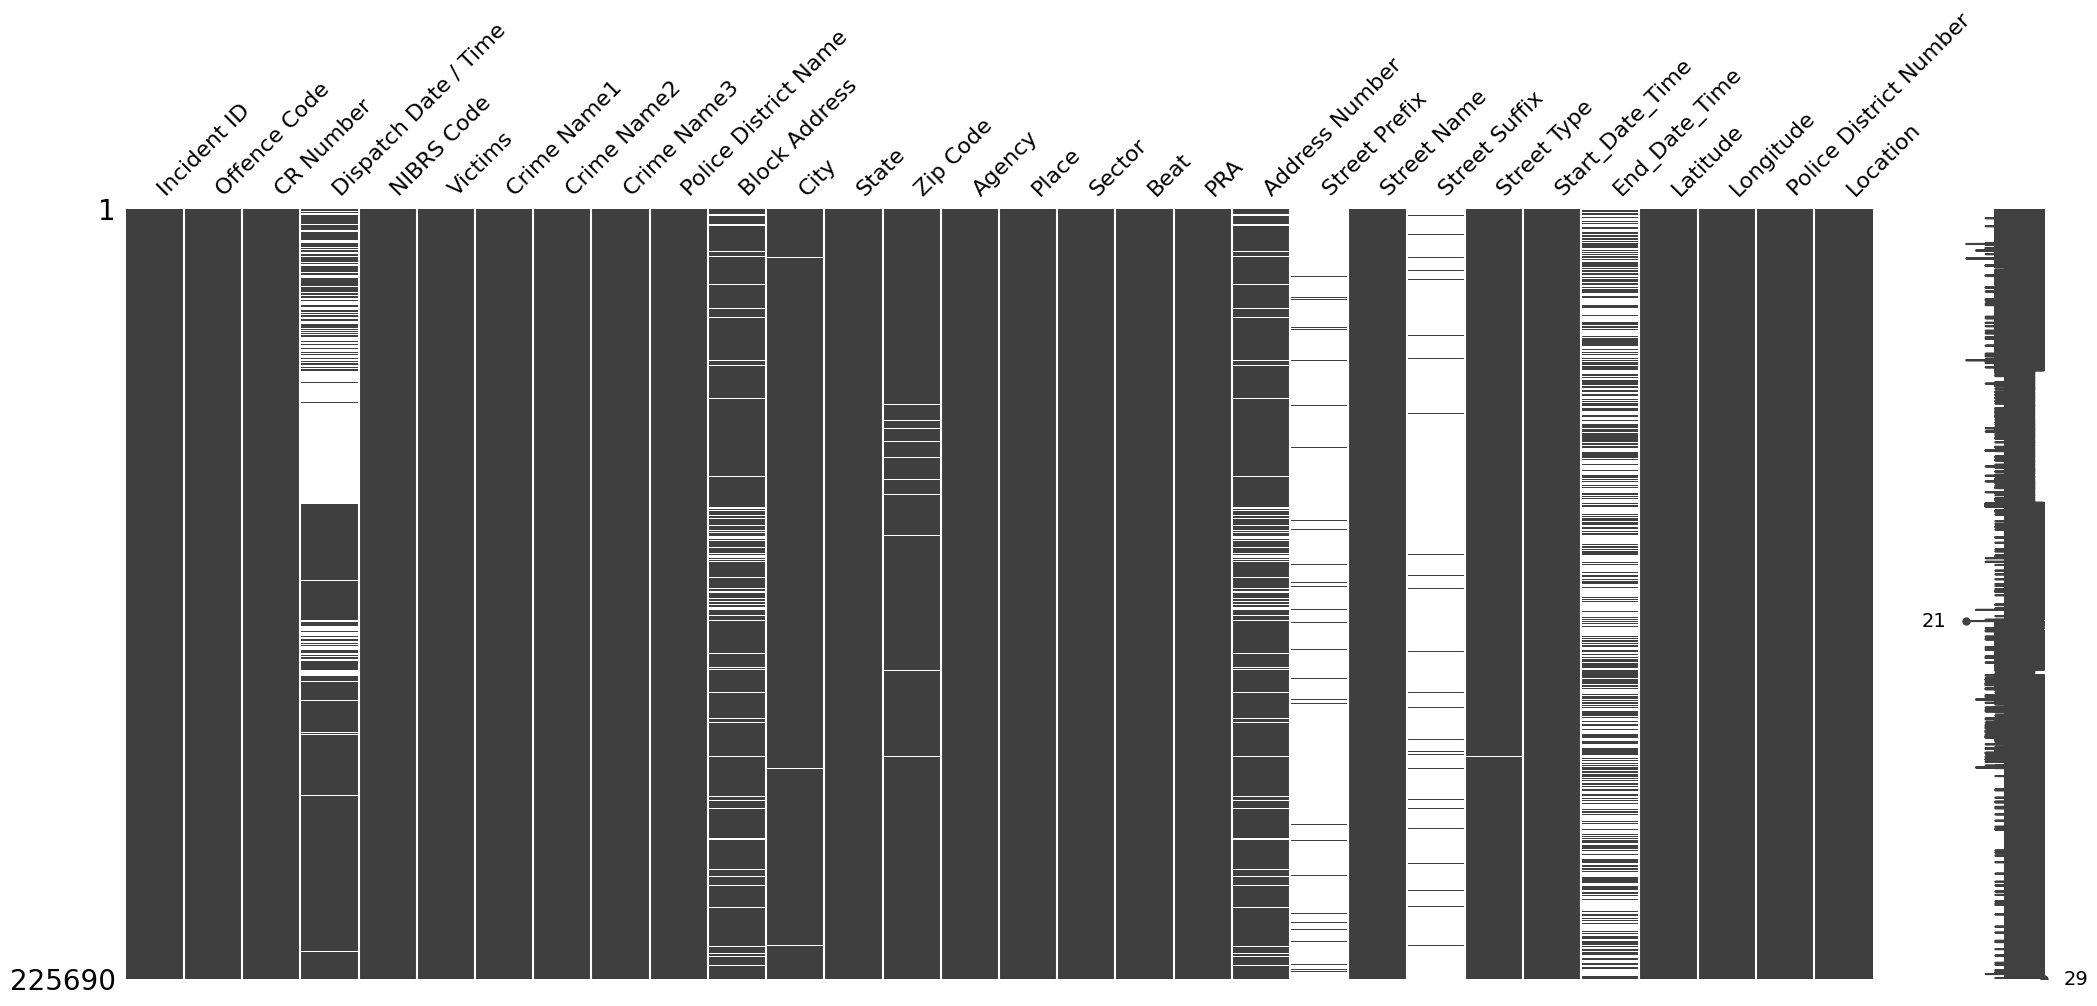

In [7]:
# 결측치 시각화
msno.matrix(df)

In [9]:
#결측치 많은 컬럼 제거
df.drop(['Dispatch Date / Time', 'Block Address', 'Address Number', 'Street Prefix', 'Street Suffix', 'End_Date_Time'], axis=1, inplace=True)

<AxesSubplot:>

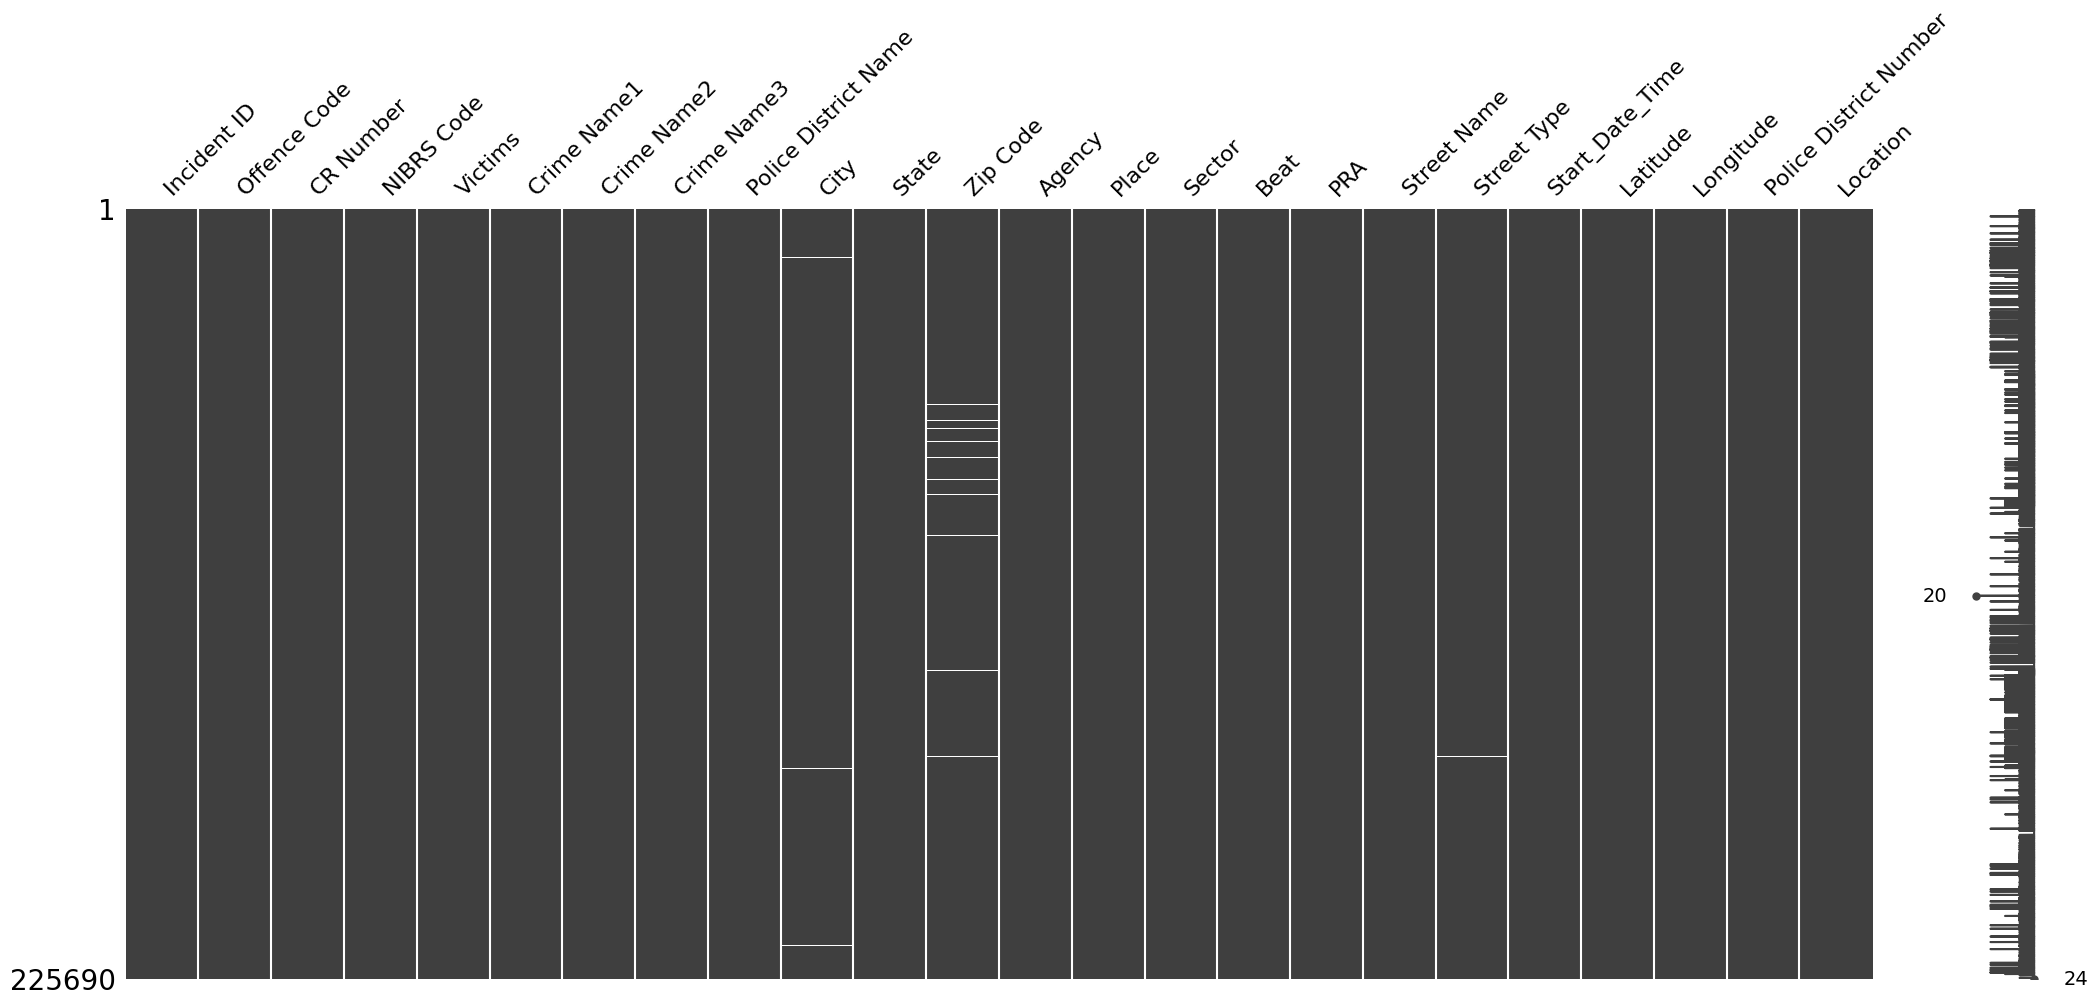

In [11]:
msno.matrix(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             225690 non-null  float64
 1   Offence Code            225690 non-null  object 
 2   CR Number               225690 non-null  float64
 3   NIBRS Code              225690 non-null  object 
 4   Victims                 225690 non-null  float64
 5   Crime Name1             225549 non-null  object 
 6   Crime Name2             225549 non-null  object 
 7   Crime Name3             225549 non-null  object 
 8   Police District Name    225690 non-null  object 
 9   City                    224633 non-null  object 
 10  State                   225690 non-null  object 
 11  Zip Code                222503 non-null  float64
 12  Agency                  225690 non-null  object 
 13  Place                   225690 non-null  object 
 14  Sector              

In [12]:
df['Crime Name1'].value_counts()

Crime Against Property    98217
Crime Against Society     58535
Other                     45164
Crime Against Person      20916
Not a Crime                2717
Name: Crime Name1, dtype: int64

In [14]:
px.pie(values=df['Crime Name1'].value_counts().values, names=df['Crime Name1'].value_counts().index, title="범죄명1 title")

In [22]:
df['Crime Name2'].value_counts()

All Other Offenses                             52181
Drug/Narcotic Violations                       20920
Theft From Motor Vehicle                       19682
Simple Assault                                 14881
Destruction/Damage/Vandalism of Property       13659
Driving Under the Influence                    12056
Shoplifting                                    11554
All other Larceny                              10199
Theft from Building                             8406
Burglary/Breaking and Entering                  6547
Liquor Law Violations                           6263
Identity Theft                                  4444
Disorderly Conduct                              4415
False Pretenses/Swindle/Confidence Game         4267
Motor Vehicle Theft                             4099
Theft of Motor Vehicle Parts or Accessories     3717
Trespass of Real Property                       3303
Credit Card/Automatic Teller Machine Fraud      3113
Aggravated Assault                            

In [26]:
df['Crime Name2'].value_counts()

All Other Offenses                             52181
Drug/Narcotic Violations                       20920
Theft From Motor Vehicle                       19682
Simple Assault                                 14881
Destruction/Damage/Vandalism of Property       13659
Driving Under the Influence                    12056
Shoplifting                                    11554
All other Larceny                              10199
Theft from Building                             8406
Burglary/Breaking and Entering                  6547
Liquor Law Violations                           6263
Identity Theft                                  4444
Disorderly Conduct                              4415
False Pretenses/Swindle/Confidence Game         4267
Motor Vehicle Theft                             4099
Theft of Motor Vehicle Parts or Accessories     3717
Trespass of Real Property                       3303
Credit Card/Automatic Teller Machine Fraud      3113
Aggravated Assault                            

In [20]:
df['Crime Name3'].value_counts()

LARCENY - FROM AUTO                       19682
DRUGS - MARIJUANA - POSSESS               14401
POLICE INFORMATION                        12783
ASSAULT - 2ND DEGREE                      12187
LARCENY - SHOPLIFTING                     11554
                                          ...  
STOLEN PROPERTY - TRANSPORT INTERSTATE        1
WEAPON - ALTERING IDENTIFICATION ON           1
LIQUOR - MANUFACTURE                          1
GAMBLING - DICE GAME                          1
COMM SEX OFF - KEEPING HOUSE ILL FAME         1
Name: Crime Name3, Length: 325, dtype: int64

In [48]:
times = list(df['Start_Date_Time'].values)
month = [int(i.split(' ')[0][0:2]) for i in times]
day = [int(i.split(' ')[0][3:5]) for i in times]
year = [int(i.split(' ')[0][6:]) for i in times]
date = [i.split(' ')[0] for i in times]

# weekday = [datetime.datetime(int(year[i]), int(month[i]), int(day[i])).weekday() for i in range(len(year))]
weekday = [datetime.datetime(int(date[i])).weekday() for i in range(len(year))]
df['Weekday'] = weekday

hour = [int(i.split(' ')[1].split(':')[0]) for i in times]
for i in range(len(times)):
    if times[i].split(' ')[-1]=='PM' and hour[i]!=12 and hour[i]!=0:
        hour[i] = hour[i]+12 
    elif times[i].split(' ')[-1]=='AM' and hour[i]== 12:
        hour[i]=0
        
df['Hour'] = hour
df['Month'] = month
df['Year'] = year
df['Date'] = pd.to_datetime(date)
df = df.sort_values(by='Date')

In [45]:
df

,Incident ID,Offence Code,CR Number,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,...,Police District Number,Location,Month,day,year,time,Hour,Year,Date,Weekday
135634,201087333.0,9101.0,16033355.0,90Z,1.0,Other,All Other Offenses,SUDDEN DEATH,WHEATON,SILVER SPRING,...,4D,"(39.0257, -77.021)",7,01,2016,04,16,2016,2016-07-01,4
61254,201102727.0,9105.0,16052672.0,90Z,1.0,Other,All Other Offenses,LOST PROPERTY,MONTGOMERY VILLAGE,GAITHERSBURG,...,6D,"(39.1607, -77.1451)",7,01,2016,12,0,2016,2016-07-01,4
53111,201094540.0,2604.0,16042278.0,26C,1.0,Crime Against Property,Impersonation,FRAUD - IMPERSONATION,BETHESDA,CHEVY CHASE,...,2D,"(38.98, -77.093)",7,01,2016,11,11,2016,2016-07-01,4
62097,201103549.0,2699.0,16053730.0,26A,1.0,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),ROCKVILLE,ROCKVILLE,...,1D,"(39.0705, -77.1215)",7,01,2016,12,0,2016,2016-07-01,4
52923,201094346.0,2604.0,16042011.0,26C,1.0,Crime Against Property,Impersonation,FRAUD - IMPERSONATION,SILVER SPRING,SILVER SPRING,...,3D,"(39.014, -77.0125)",7,01,2016,12,12,2016,2016-07-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130350,201307418.0,2699.0,200042544.0,26A,1.0,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),CITY OF TAKOMA PARK,TAKOMA PARK,...,8D,"(38.9848, -76.9963)",10,28,2020,01,13,2020,2020-10-28,2
129654,201307348.0,1399.0,200042468.0,13B,1.0,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,GERMANTOWN,GERMANTOWN,...,5D,"(39.1671, -77.2635)",10,28,2020,01,1,2020,2020-10-28,2
130057,201307386.0,9105.0,200042515.0,90Z,1.0,Other,All Other Offenses,LOST PROPERTY,WHEATON,SILVER SPRING,...,4D,"(39.0361, -77.0501)",10,28,2020,09,9,2020,2020-10-28,2
129228,201307406.0,2611.0,200042543.0,26G,1.0,None,None,None,GERMANTOWN,CLARKSBURG,...,5D,"(39.2436, -77.2745)",10,28,2020,11,11,2020,2020-10-28,2


In [47]:
df['Weekday'].value_counts()

4    35759
2    33592
3    33418
1    33267
0    31141
5    30550
6    27963
Name: Weekday, dtype: int64